In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
plans = {
    "bronze": {
        "premiums_total": 627.16 * 12,
        "oop_max": 16_400, # family, in-network
        "deductible": 13_700, # family, in-network
        "coinsurance": 0.40,
    },
    "gold": {
        "premiums_total": 962.96 * 12,
        "oop_max": 16_400, # family, in-network
        "deductible": 3_000, # family, in-network
        "coinsurance": 0.20,
    },
}

In [4]:
def paid(billed, plan=None):
    premiums = plans[plan]["premiums_total"]
    deductible = plans[plan]["deductible"]
    oop_max = plans[plan]["oop_max"]
    coinsurance = plans[plan]["coinsurance"]
    
    if billed < deductible:
        paid = premiums + billed
    else:
        oop_maybe = deductible + (coinsurance * (billed - deductible))
        oop_paid = min(oop_maybe, oop_max)
        paid = premiums + oop_paid
    
    return paid

In [5]:
billed_expenses = [1_000 * i for i in range(81)]

df = pd.DataFrame({
    "bronze": pd.Series(
        [paid(b, plan="bronze") for b in billed_expenses],
        index=billed_expenses,
    ),
    "gold": pd.Series(
        [paid(b, plan="gold") for b in billed_expenses],
        index=billed_expenses,
    ),
})

<AxesSubplot:xlabel='billed/yr', ylabel='paid/yr'>

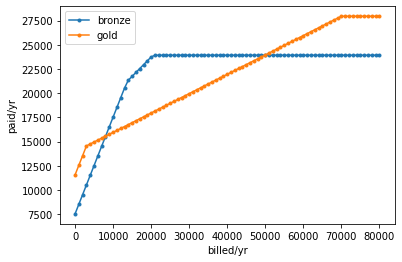

In [6]:
df.plot(marker=".", xlabel="billed/yr", ylabel="paid/yr")

<AxesSubplot:xlabel='billed/yr', ylabel='savings with bronze'>

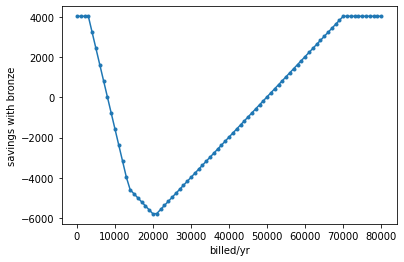

In [7]:
(df["gold"] - df["bronze"]).plot(
    marker=".",
    xlabel="billed/yr",
    ylabel="savings with bronze"
)

In [8]:
print("zero-crossings:")
for billed, savings in (df["gold"] - df["bronze"]).items():
    if abs(savings) < 50:
        print(billed)

zero-crossings:
8000
50000
